## HOMEWORK - 10 points

Repeat the binary classification with Glycerophospholipids, and check which features are important. To clarify the question, you have already performed multi-class classification. You simply need to obtain AUROC and feature importances for Glycerophospholipids vs. Not_Glycerophospholipids. 

Make a single Jupyter Notebook with your name in the file name, and upload it on Canvas. Points will be given as follows:

1. How easy is it to run the code? -- 2 points
2. Is the code well-commented? -- 2 points
3. Is the AUROC graph correct? -- 2 points
4. Is the Feature Importance graph correct? -- 2 point
5. Is there an interpretation provided for feature importance -- 2 points

This exercise should take <15 minutes to complete and submit. Submit on Canvas by Wed morning 9am.

In [1]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Overall model score:  0.996268656716418
0.9999421763380757


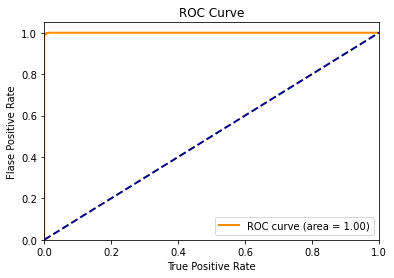

In [8]:
#obtain AUROC
#Read in the file
s = pd.read_csv('small_input_file.tab',sep="\t") #sep="\t"，Use TAB separation
#Get the labels and features
labels=s['Category']
feats=s[s.columns[5:]]
#split data into train data and test data
train_feats, test_feats, train_labels, test_labels  = train_test_split (feats, labels, test_size=0.2, random_state=0)
class_names=list(set(train_labels)) #get all class names
# find 'Glycerolipids' class
for name in class_names:
    if name=='Glycerolipids':
        pass
    else:
        train_labels=pd.Series(train_labels).str.replace(name,'Not_FA') #replace labels in training
        test_labels=pd.Series(test_labels).str.replace(name,'Not_FA') #replace labels in test
#Run Random Forest classifier on them and print the overall model score
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=0) 
trained_model = rf.fit(train_feats, train_labels)
model_scores=rf.score(test_feats, test_labels)
print ("Overall model score: ", model_scores)

#Get the Area Under the Receiver Operating Characteristic (AUC-ROC or AUROC)
y_score=trained_model.predict_proba(test_feats)[:, 1]
#fpr, tpr, _ = roc_curve(test_labels, y_score, pos_label='Glycerolipids')
fpr, tpr, _ = roc_curve(test_labels, y_score, pos_label='Not_FA')
roc_auc = auc(fpr, tpr)
print (roc_auc)

#Plot the AUROC curve
#set figure
plt.figure()
#set plot's parameters
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('True Positive Rate')
plt.ylabel('Flase Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

              importance
NumofO          0.184070
Afterdecmass    0.165394
C:O             0.130142
NumofC          0.126259
H:O             0.121978
Mass            0.116657
NumofH          0.068569
RMD             0.025419
NumofN          0.013394
AMD             0.011612
NumofP          0.011371
C:P             0.008571
H:C             0.007947
C:N             0.007057
C:S             0.000959
NumofS          0.000601


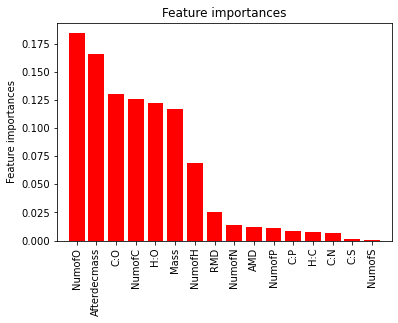

In [6]:
## Feature importance

feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = train_feats.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

# Print the feature ranking
print (feature_importances)
# Plot the feature importances of the forest
figcolumns=feature_importances.index.values
#create figure and set plot's parameters
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_feats.shape[1]), feature_importances.importance,
       color="r", align="center")
plt.ylabel("Feature importances")
plt.xticks(range(train_feats.shape[1]), figcolumns, rotation='vertical')
plt.xlim([-1, train_feats.shape[1]])
plt.show()

As we can see, NumofO is the feature that has the greatest influence on the decision of nodes, with the feature importance of 0.184070, and NumofS is the least important feature for the outcome, with the feature importance of 0.000601. 